**Aufgabe 1 : Schätzung und Test im bivariaten Modell**

**Verwendeter Datensatz:** https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction

**Ziel:** Vorhersage der Immobilienpreise in Paris auf Basis einer einzelnen unabhängigen Variable (bivariat)

**Allgemeines Vorgehen:**
1. Daten laden und aufbereiten
2. EDA
3. Modellspezifikation
4. Modellschätzung
5. Modellbewertung
6. Hypothesentest
7. Interpretation der Ergebnisse


In [36]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from scipy import stats
from sklearn.feature_selection import f_regression

1. Daten laden und aufbereiten (Daten bereinigen/transformieren und fehlende Werte beseitigen)

In [3]:
# load database
housing_data = pd.read_csv('ParisHousing.csv')
housing_data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
# get general information
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
# missing data points
print('Missing data points:')
print(housing_data.isnull().sum())

Missing data points:
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


2. EDA (Verteilung der Variablen verstehen und potenzielle Beziehungen zwischen den Variablen identifizieren)

In [6]:
# Summary statistics
print('Summary statistics:')
housing_data.describe().round(2)

Summary statistics:


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00
mean,49870.13,50.36,0.51,0.5,50.28,50225.49,5.51,5.52,2005.49,0.5,0.5,5033.10,5028.01,553.12,0.5,4.99,4993447.53
std,28774.38,28.82,0.50,0.5,28.89,29006.68,2.87,2.86,9.31,0.5,0.5,2876.73,2894.33,262.05,0.5,3.18,2877424.11
min,89.00,1.00,0.00,0.0,1.00,3.00,1.00,1.00,1990.00,0.0,0.0,0.00,1.00,100.00,0.0,0.00,10313.50
25%,25098.50,25.00,0.00,0.0,25.00,24693.75,3.00,3.00,1997.00,0.0,0.0,2559.75,2512.00,327.75,0.0,2.00,2516401.95
50%,50105.50,50.00,1.00,0.0,50.00,50693.00,5.00,5.00,2005.50,0.0,0.0,5092.50,5045.00,554.00,1.0,5.00,5016180.30
75%,74609.75,75.00,1.00,1.0,76.00,75683.25,8.00,8.00,2014.00,1.0,1.0,7511.25,7540.50,777.25,1.0,8.00,7469092.45
max,99999.00,100.00,1.00,1.0,100.00,99953.00,10.00,10.00,2021.00,1.0,1.0,10000.00,10000.00,1000.00,1.0,10.00,10006771.20


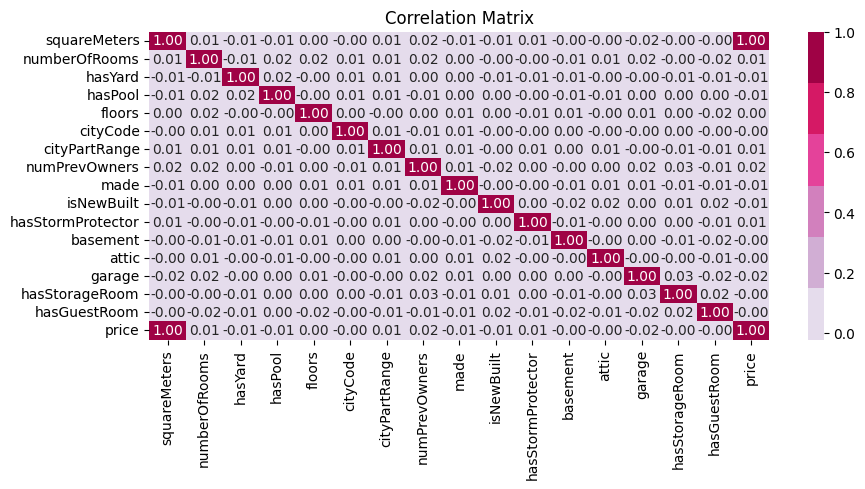

In [7]:
# Data Visualization

# Correlation Matrix
correlation_matrix = housing_data.corr()

colormap = sns.color_palette("PuRd") 

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, cmap = colormap, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Korrelationsplot zeigt, dass die Quadratmeterzahl vollständig linear zu dem Preis verläuft. Für weitere Features muss evt. eine Normalisierung vorgenommen werden.
Zur Schätzung im bivariaten Modell wird aufgrund der starken Korrelation die Quadratmeterzahl als unabhängige Variable untersucht.

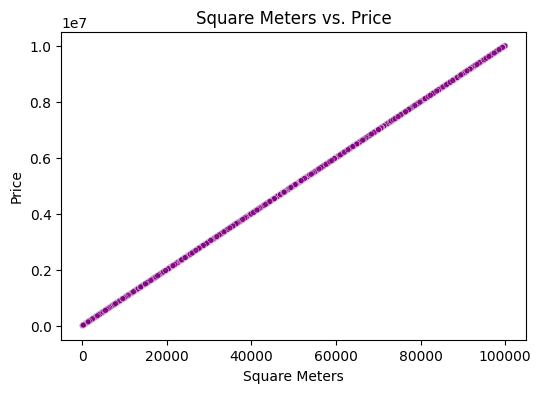

In [8]:
# Scatter plot of SquareMeters vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='squareMeters', y='price', data=housing_data, alpha=0.8, size=1, legend = False, color = 'purple')
plt.title('Square Meters vs. Price')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

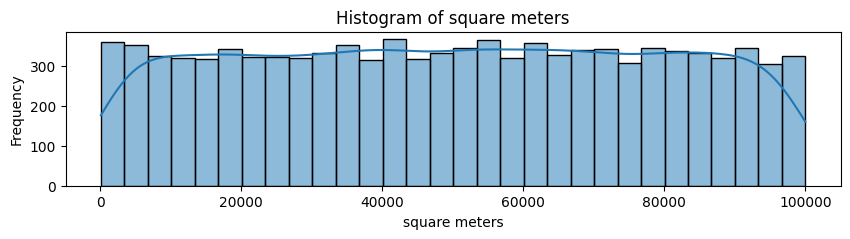

In [9]:
# Histogram of squareMeters
plt.figure(figsize=(10, 2))
sns.histplot(housing_data['squareMeters'], bins=30, kde=True)
plt.title('Histogram of square meters')
plt.xlabel('square meters')
plt.ylabel('Frequency')
plt.show()

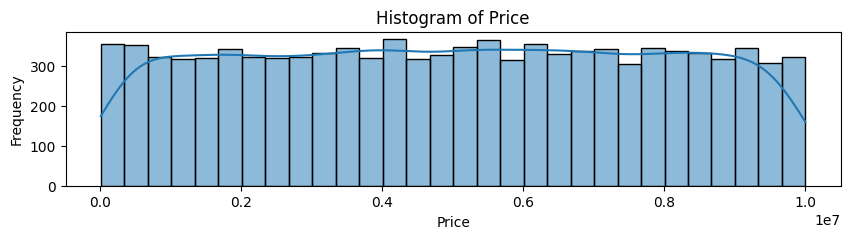

In [10]:
# Histogram of Price
plt.figure(figsize=(10, 2))
sns.histplot(housing_data['price'], bins=30, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


3. Modellspezifikation (bivariates Modell mit zugehörigen Variablen definieren)

In [11]:
X = housing_data['squareMeters'].values
y = housing_data['price'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train = X_train.reshape(-1, 1)

In [12]:
# Specify the model (bivariate linear regression)
model = LinearRegression()

# Fit the model
result = model.fit(X_train, y_train)

print("Coefficient:", model.coef_[0])

print("Intercept:", model.intercept_)


Coefficient: 99.99910123854431
Intercept: 6475.100756408647


Der Koeffizient besagt, dass für jeden zusätzlichen Quadratmeter der Preis um 99,99 Euro steigen wird.

Die Y-Intercept repräsentiert die abhängige Variable, wenn die unabhängige Variable null ist. Hier ist die Interpretation als Bedeutungslos anzusehen (Es macht keinen Sinn für 0 Quadratmeter einen Preis zu verlangen)

In [20]:
# set intercept to 0
model.fit_intercept = False

# Fit the model
result = model.fit(X_train, y_train)

print("Coefficient:", model.coef_[0])

# save parameters
coefficients = np.append(model.intercept_, model.coef_)

Coefficient: 100.09638715068341


4. Modellschätzung (Parameter des Modells schätzen)

In [14]:
# Make predictions
predictions = model.predict(X_train)

predictions[:5]

array([3816875.43482986, 6085560.0496001 , 6057332.86842361,
       8225520.71049456, 8497682.78715727])

5. Modellbewertung (Güte des Modells bewerten)

In [16]:
# Compute R-squared value
r2 = r2_score(y_train, predictions).round(6)
print("R-squared:", r2)

# Compute mean squared error
mape = mean_absolute_percentage_error(y_train, predictions).round(6)
print("Mean Absolute Percentage Error:", mape)

mse = mean_squared_error(y_train, predictions).round(6)
print("Mean Squared Error:", mse)

R-squared: 0.999997
Mean Absolute Percentage Error: 0.003628
Mean Squared Error: 21194061.041346


TODO here: check why the MSE is still high and what does it say for dataset

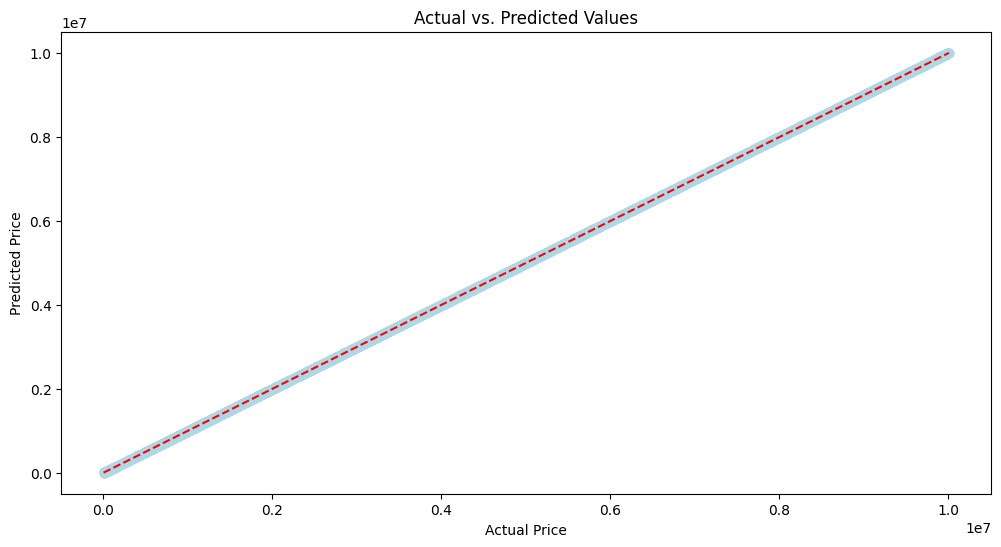

In [29]:
# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_train, predictions, color='lightblue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red')  
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

6. Hypothesentests (Prüfung, ob die Parameter deines Modells signifikant von Null verschieden sind; z.B. T-Test)

Null and Alternative Hypotheses:<br>
<br>
<br>
Null Hypothesis:<br>

The null hypothesis states that there is no significant relationship between the independent variable and the dependent variable (i.e., the regression coefficient is zero).<br>
<br>
<br>

Alternative Hypothesis:<br>

The alternative hypothesis states that there is a significant relationship between the independent variable and the dependent variable (i.e., the regression coefficient is not zero).


In [26]:
# T-Test
residuals = y_train - predictions
degrees_of_freedom = len(X_train) - len(X_train[0])  # n - k, where n is the number of observations and k is the number of predictors
standard_error = np.sqrt(np.sum(residuals**2) / degrees_of_freedom)

# Calculate t-statistic
t_statistic = coefficients / standard_error

# Calculate two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), degrees_of_freedom))

# Print results
print("Coefficients:", coefficients)
print("T-Statistic:", t_statistic)
print("P-Values:", p_value)

Coefficients: [  0.         100.09638715]
T-Statistic: [0.         0.02174123]
P-Values: [1.         0.98265491]


The p-value for the intercept is 1, which means it is not statistically significant.
The p-value for the coefficient of the second independent variable is 0.98265491, indicating that it is not statistically significant.



Based on the t-tests, neither the intercept nor the coefficient for the second independent variable is statistically significant at the 0.05 significance level. This suggests that there is insufficient evidence to conclude that these coefficients are different from zero, meaning that the model may not be a good fit for the data or that the independent variables may not have a significant linear relationship with the dependent variable.

In [37]:
# F-Test
# Perform F-test
f_statistic, p_value = f_regression(X_train, y_train)

# Print results
print("F-Statistic:", f_statistic[0])
print("P-Value:", p_value[0])

F-Statistic: 6260586284.49586
P-Value: 0.0


Overall, the large F-statistic and very low p-value provide strong evidence that the linear regression model is statistically significant and that the independent variable is significantly associated with the dependent variable in a bivariate analysis.

The F-statistic measures the overall fit of the linear regression model. A larger F-statistic indicates a better fit of the model to the data.
In this case, the F-statistic is exceptionally large, suggesting that the model explains a significant amount of the variability in the dependent variable.

The p-value associated with the F-test represents the probability of observing the data given that the null hypothesis (the model has no explanatory power) is true.
A low p-value (typically less than 0.05) indicates that the model is statistically significant.
In this output, the p-value is approximately zero (0.0), which is well below the conventional threshold of 0.05.
This indicates strong evidence against the null hypothesis and suggests that the linear regression model is statistically significant at any reasonable significance level.

7. Interpretation der Ergebnisse (Schlussfolgerungen ableiten)

xxx